# Exploratory Data Analysis

In [3]:
!pip install pandas matplotlib wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB ? eta -:--:--
   ----------- --------------------------- 92.2/301.4 kB 871.5 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/301.4 kB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/301.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/301.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  297.0/301.4 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 887.7 kB/s eta 0:00:00


In [5]:
import pandas as pd

data = pd.read_excel("Schizophrenia_data.xlsx")

# Checking the first few rows of the dataset
print(data.head())


   ID SampleID     FAM  PID                                              Notes
0   1   1001-1  1001.0  1.0  FAM 1001; PID 1 Diagnosis: Schizophrenia Sex: ...
1   2   1002-1  1002.0  1.0  1999-1995 was member of a religious sect. Prem...
2   3   1003-1  1003.0  1.0  1993 onset with depression. Hospitalised and t...
3   4   1004-1  1004.0  1.0                                                NaN
4   5   1005-1  1005.0  1.0  MA1005, SZ Since 1985 on depot. Almost constan...


In [7]:
#Overview
print(data.info())

# Checking for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1143 non-null   int64  
 1   SampleID  927 non-null    object 
 2   FAM       1139 non-null   float64
 3   PID       1139 non-null   float64
 4   Notes     1121 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 44.8+ KB
None
ID            0
SampleID    216
FAM           4
PID           4
Notes        22
dtype: int64


### Word Count in the Notes Column

In [12]:

data['Notes_Word_Count'] = data['Notes'].apply(lambda x: len(str(x).split()))

# stats
print(data['Notes_Word_Count'].describe())


count    1143.000000
mean      163.344707
std       178.708125
min         1.000000
25%        63.000000
50%       111.000000
75%       190.000000
max      1602.000000
Name: Notes_Word_Count, dtype: float64


### Visualization

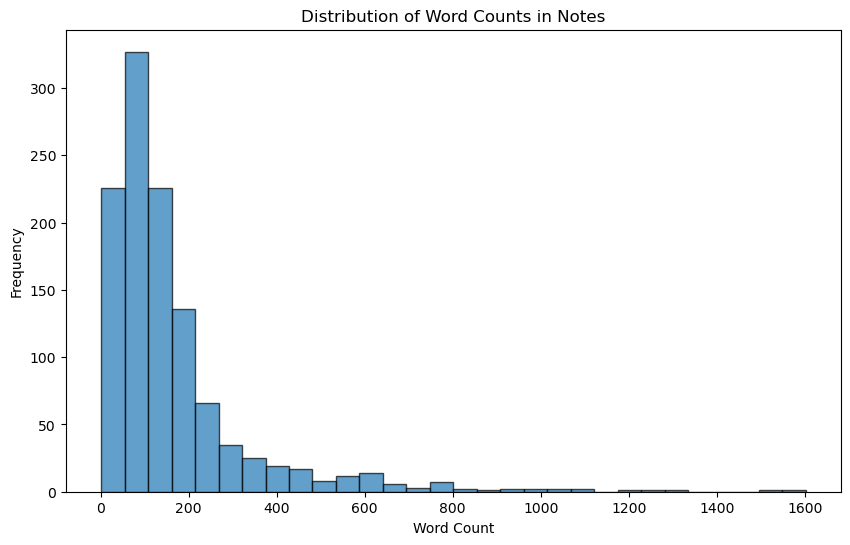

In [15]:
import matplotlib.pyplot as plt

# histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(data['Notes_Word_Count'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Word Counts in Notes')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


 The distribution is right-skewed. There’s a high frequency of shorter notes (mostly under 300 words), while longer notes (above 500 words) are much less common.

### Common Terms

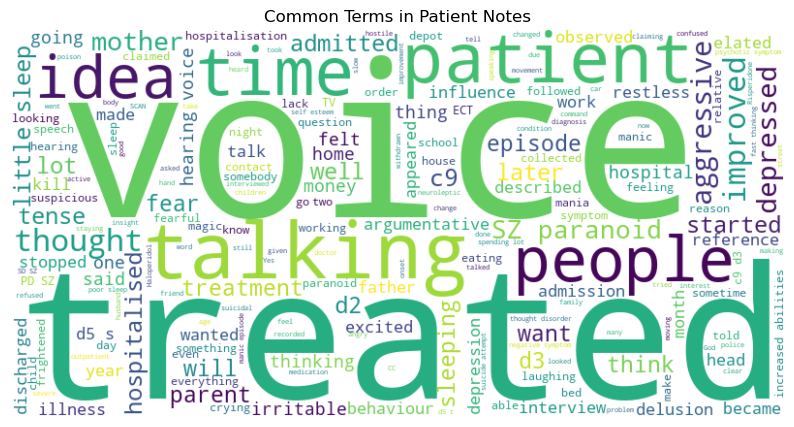

In [19]:
from wordcloud import WordCloud, STOPWORDS

all_notes = " ".join(str(note) for note in data['Notes'])

# stop words (common words to ignore)
stopwords = set(STOPWORDS)

# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_notes)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Terms in Patient Notes')
plt.show()


### Medications Mentioned

In [28]:
# Example
# Common antipsychotic drug list 
medications = [
    'Haloperidol',
    'Chlorpromazine',
    'Perphenazine',
    'Thioridazine',
    'Trifluoperazine',
    'Fluphenazine',
    'Clozapine',
    'Risperidone',
    'Olanzapine',
    'Quetiapine',
    'Ziprasidone',
    'Aripiprazole',
    'Paliperidone',
    'Iloperidone',
    'Asenapine',
    'Lurasidone',
    'Cariprazine',
    'Lumateperone'
];


for med in medications:
    data[med] = data['Notes'].str.contains(med, case=False, na=False).astype(int)

medication_counts = data[medications].sum()
print(medication_counts)


Haloperidol        73
Chlorpromazine     16
Perphenazine        0
Thioridazine        1
Trifluoperazine     0
Fluphenazine       16
Clozapine          76
Risperidone        80
Olanzapine          7
Quetiapine          9
Ziprasidone         0
Aripiprazole        0
Paliperidone        0
Iloperidone         0
Asenapine           0
Lurasidone          0
Cariprazine         0
Lumateperone        0
dtype: int64


### Medication Visualization

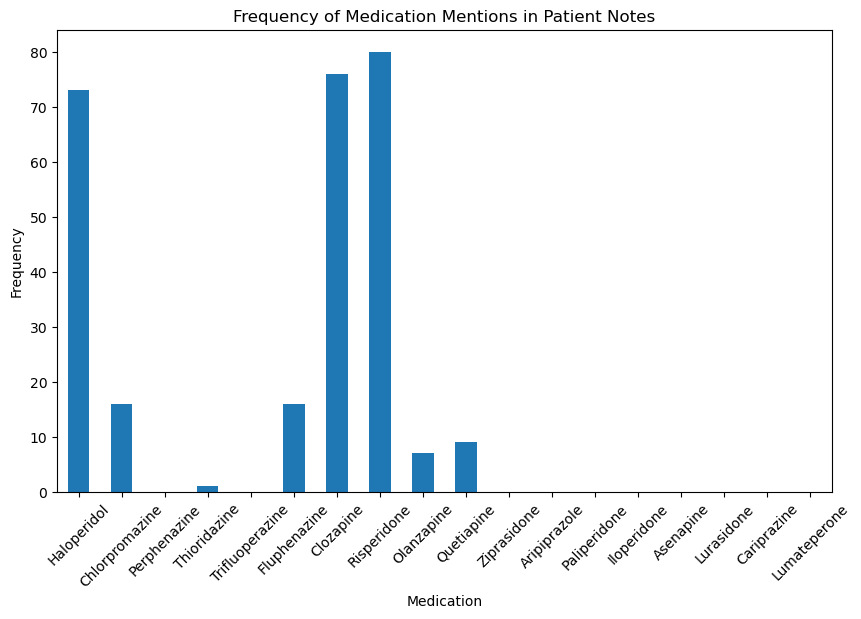

In [26]:
# Bar plot 
plt.figure(figsize=(10, 6))
medication_counts.plot(kind='bar')
plt.title('Frequency of Medication Mentions in Patient Notes')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [30]:
# txt file contains CNS drugs - BNF drugs with BNF Codes

with open('SortedBNFCodesBNFNames.txt', 'r') as file:
    medication_dict = eval(file.read())  # Using eval to convert the string to a dictionary

# Check if the dictionary loaded correctly
print(medication_dict)


{'Fluoxetine': '0403030E0AAARAR', 'Felicium': '0403030E0BCAAAA', 'Ranflutin': '0403030E0BEAAAA', 'Oxactin': '0403030E0BDAAAA', 'Prozac': '0403030E0BBABAC', 'Co-proxamol': '0407010Q0AAADAD', 'Distalgesic': '0407010Q0BDAAAA', 'Co-dydramol': '0407010N0AAAFAF', 'Galake': '0407010N0BCAAAA', 'Eroset': '0407010N0BIAAAA', 'Zopiclone': '0401010Z0AAAMAM', 'Zimovane LS': '0401010Z0BBABAC', 'Zileze': '0401010Z0BCABAA', 'Paracetamol': '0407010H0AADUDU', 'Hedex': '0407010H0CBABAM', 'Mandanol': '0407010H0CGADBG', 'Panadol': '0407010H0BFAFAA', 'Anadin Paracetamol': '0407010H0CNAAAM', 'Miradol': '0407010H0BYAAAM', 'Panadol ActiFast': '0407010H0BFAIAM', 'Panadol Advance': '0407010H0BFAJAM', 'Boots Paracetamol': '0407010H0B3AKAA', 'Paravict': '0407010H0CUAAAM', 'Zimovane': '0401010Z0BBAAAA', 'Diazepam': '0401020K0AACMCM', 'Tensium': '0401020K0BMACAH', 'Amitriptyline': '0403010B0AAA5A5', 'Citalopram': '0403030D0AAADAD', 'Cipramil': '0403030Z0BBAAAA', 'Sertraline': '0403030Q0AABCBC', 'Lustral': '0403030Q0B

In [32]:
# medication names from the dictionary keys
medication_names = list(medication_dict.keys())
print(medication_names)


['Fluoxetine', 'Felicium', 'Ranflutin', 'Oxactin', 'Prozac', 'Co-proxamol', 'Distalgesic', 'Co-dydramol', 'Galake', 'Eroset', 'Zopiclone', 'Zimovane LS', 'Zileze', 'Paracetamol', 'Hedex', 'Mandanol', 'Panadol', 'Anadin Paracetamol', 'Miradol', 'Panadol ActiFast', 'Panadol Advance', 'Boots Paracetamol', 'Paravict', 'Zimovane', 'Diazepam', 'Tensium', 'Amitriptyline', 'Citalopram', 'Cipramil', 'Sertraline', 'Lustral', 'Contulen', 'Nitrazepam', 'Mogadon', 'Dosulepin', 'Dothapax', 'Prepadine', 'Prothiaden', 'Thaden', 'Prochlorperazine', 'Proziere', 'Stemetil', 'Dihydrocodeine', 'Buccastem', 'Buccastem M', 'Co-codamol', 'Migraleve Yellow', 'Temazepam', 'Tramadol', 'Tramake', 'Zydol', 'Zamadol', 'Procyclidine', 'Kemadrin', 'Muscinil', 'Chlorpromazine', 'Largactil', 'Clomipramine', 'Anafranil', 'Carbamazepine', 'Epimaz', 'Tegretol', 'Carbagen', 'Domperidone', 'Motilium', 'Vivadone', 'Metoclopramide', 'Gastroflux', 'Metoclomex', 'Maxolon', 'Cinnarizine', 'Cinaziere', 'Stugeron', 'Mylan Travel S

In [40]:

mentioned_medications = {}

for med in medication_names:
    if data['Notes'].str.contains(med, case=False, na=False, regex=False).any():
        mentioned_medications[med] = medication_dict[med]

mentioned_medication_names = list(mentioned_medications.keys())
print(f"Medications mentioned in the Notes: {mentioned_medication_names}")



Medications mentioned in the Notes: ['Fluoxetine', 'Prozac', 'Diazepam', 'Amitriptyline', 'Chlorpromazine', 'Clomipramine', 'Carbamazepine', 'Tegretol', 'Risperidone', 'Risperdal', 'Morphine', 'Olanzapine', 'Venlafaxine', 'Paroxetine', 'Flupentixol', 'Fluanxol', 'Rivotril', 'Topiramate', 'Reboxetine', 'Quetiapine', 'Seroquel', 'Promazine', 'Thioridazine', 'Haloperidol', 'Haldol', 'Zuclopenthixol', 'Clopixol', 'Sulpiride', 'Levomepromazine', 'Mianserin', 'Fluphenazine decanoate', 'DF', 'Maprotiline', 'Ludiomil', 'Fluphenazine', 'Moditen', 'Anquil', 'Pimozide', 'Orap', 'Clozapine', 'Valproic acid', 'Clopixol Acuphase', 'Droperidol', 'Alli', 'Depakin', 'Voke']


In [44]:
#Notes to lowercase for consistent matching
data['Notes'] = data['Notes'].str.lower()

medication_names_lower = [med.lower() for med in medication_names]

mentioned_medications = {}

# medication in lowercase Notes
for med in medication_names_lower:
    if data['Notes'].str.contains(med, case=False, na=False, regex=False).any():
        mentioned_medications[med] = medication_dict.get(med.capitalize(), med)  # Capitalize to keep original format

mentioned_medication_names = list(mentioned_medications.keys())


medication_df = pd.DataFrame()

for med in mentioned_medication_names:
    medication_df[med] = data['Notes'].str.contains(med, case=False, na=False, regex=False).astype(int)

data = pd.concat([data, medication_df], axis=1)

#  occurrences 
medication_mentions = medication_df.sum()
print(medication_mentions)


fluoxetine                 1
prozac                     3
diazepam                   9
amitriptyline              4
chlorpromazine            16
clomipramine               8
carbamazepine             69
tegretol                   1
risperidone               80
risperdal                  1
morphine                   1
olanzapine                 7
venlafaxine                2
paroxetine                 2
flupentixol                6
fluanxol                   5
rivotril                   2
topiramate                 1
reboxetine                 1
quetiapine                 9
seroquel                   4
promazine                 23
thioridazine               1
haloperidol               73
haldol                     1
zuclopenthixol             3
clopixol                  11
sulpiride                  4
levomepromazine            9
mianserin                  1
fluphenazine decanoate    11
df                        17
maprotiline                2
ludiomil                   1
fluphenazine  

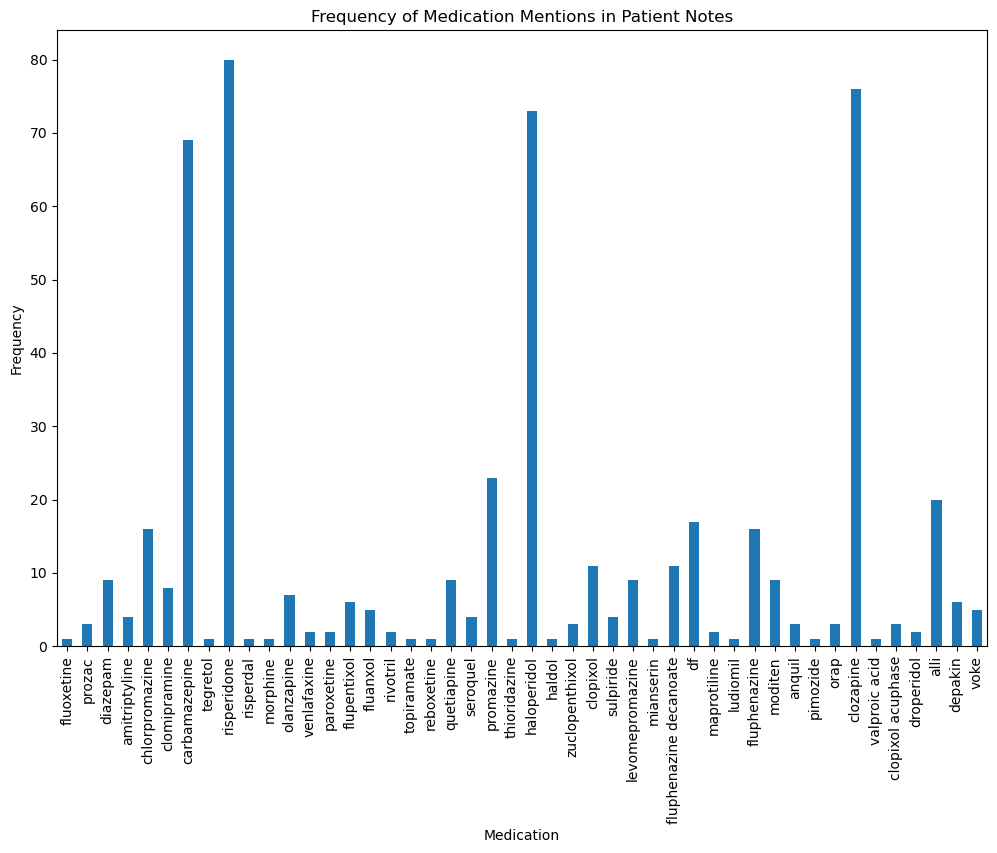

In [46]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
medication_mentions.plot(kind='bar')
plt.title('Frequency of Medication Mentions in Patient Notes')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


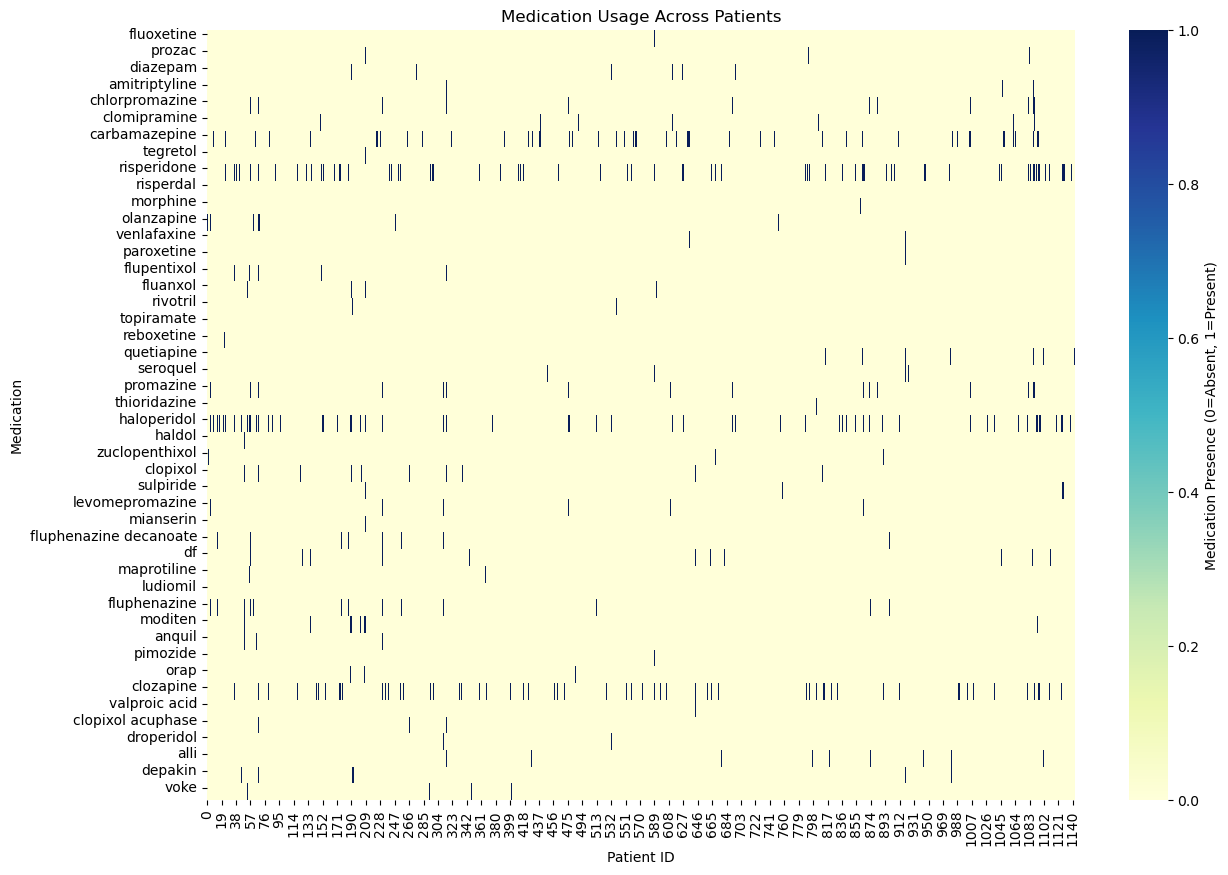

In [48]:
import seaborn as sns


medication_data = data[medication_mentions.index]

#heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(medication_data.T, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Medication Presence (0=Absent, 1=Present)'})
plt.title('Medication Usage Across Patients')
plt.xlabel('Patient ID')
plt.ylabel('Medication')
plt.show()


In [64]:
# Sorting
medication_mentions_sorted = medication_mentions.sort_values(ascending=False)

print(medication_mentions_sorted)


risperidone               80
clozapine                 76
haloperidol               73
carbamazepine             69
promazine                 23
alli                      20
df                        17
chlorpromazine            16
fluphenazine              16
fluphenazine decanoate    11
clopixol                  11
diazepam                   9
quetiapine                 9
moditen                    9
levomepromazine            9
clomipramine               8
olanzapine                 7
depakin                    6
flupentixol                6
voke                       5
fluanxol                   5
seroquel                   4
sulpiride                  4
amitriptyline              4
clopixol acuphase          3
orap                       3
anquil                     3
zuclopenthixol             3
prozac                     3
droperidol                 2
paroxetine                 2
maprotiline                2
venlafaxine                2
rivotril                   2
tegretol      

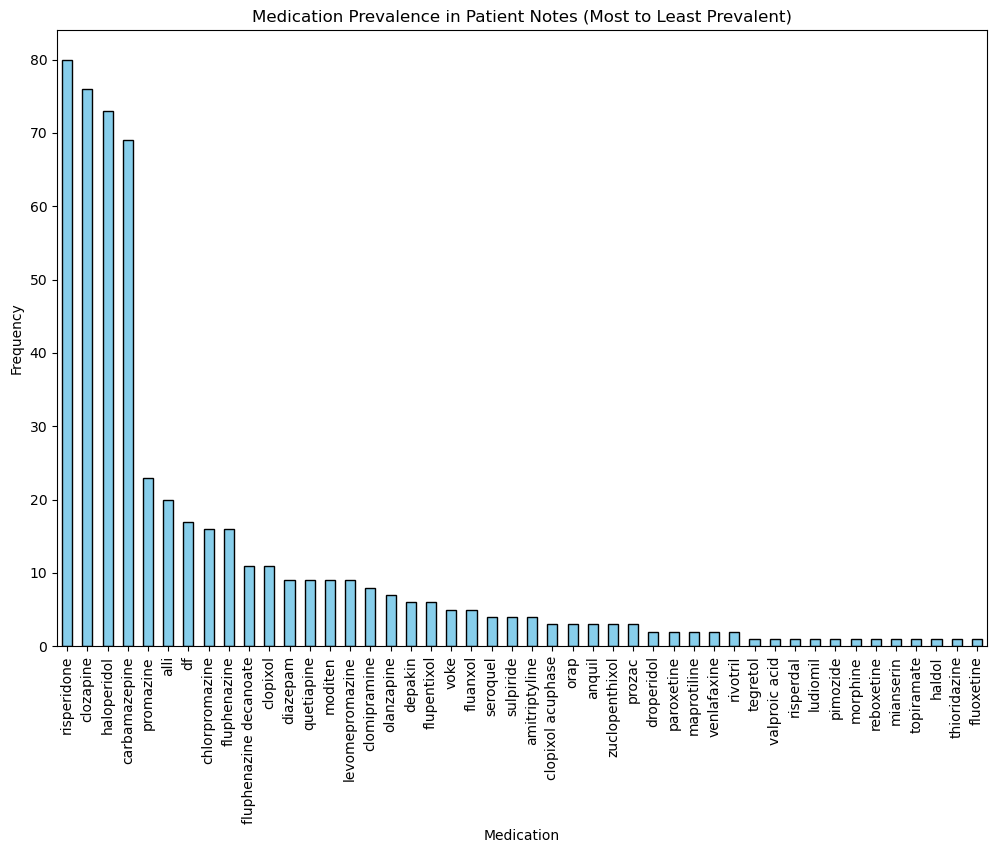

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
medication_mentions_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Medication Prevalence in Patient Notes (Most to Least Prevalent)')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


### Classifying medication by its BNF Code

In [137]:
# mapping for BNF code categories
category_map = {
    "040101": "Hypnotics",
     "040102": "Anxiolytics",
     "040103": "Barbiturates",
     "040104": "Other hypnotics and anxiolytics",
    
    "040301": "Tricyclic and related antidepressant drugs",
    "040302": "Monoamine-oxidase inhibitors (maois)",
    "040303": "Selective serotonin re-uptake inhibitors",
    "040304": "Other antidepressant drugs",
    
    "040201": "Antipsychotics",
    "040202": "Antipsychotics depot injections",
    "040203": "mania and hypomania",
    
    "040401": "CNS stimulants and drugs used for ADHD",
    
    "040501": "Drugs used in the treatment of obesity",
    
    "040600": "Drugs used in nausea and vertigo",
    
    "040701": "Non-opioid analgesics and compound preparations",
    "040702": "Opioid analgesics",
    "040703": "Neuropathic pain",
    "040704": "Antimigraine drugs",
    
    "040801": "Antiepileptic drugs",
    
    "0409": "Drugs used in parkinsonism and related disorders",
    
    "041001": "Alcohol dependence",
     "041002": "Nicotine dependence",
     "041003": "Opioid dependence",
    "041100": "Drugs for dementia"
}



medication_dict = {med.lower(): code for med, code in medication_dict.items()}

# stores medication classifications
medication_classifications = {}


for med in medication_mentions.index:
    bnf_code = medication_dict[med]
    category_code = bnf_code[:6]  
    category = category_map.get(category_code, "other")
    medication_classifications[med] = category

#dataframe
medication_classifications_df = pd.DataFrame(list(medication_classifications.items()), columns=['Medication', 'Category'])

medication_counts_df = pd.DataFrame(medication_mentions, columns=['Frequency']).reset_index().rename(columns={'index': 'Medication'})
classified_medication_df = medication_counts_df.merge(medication_classifications_df, on="Medication")
print(classified_medication_df)


                Medication  Frequency  \
0               fluoxetine          1   
1                   prozac          3   
2                 diazepam          9   
3            amitriptyline          4   
4           chlorpromazine         16   
5             clomipramine          8   
6            carbamazepine         69   
7                 tegretol          1   
8              risperidone         80   
9                risperdal          1   
10                morphine          1   
11              olanzapine          7   
12             venlafaxine          2   
13              paroxetine          2   
14             flupentixol          6   
15                fluanxol          5   
16                rivotril          2   
17              topiramate          1   
18              reboxetine          1   
19              quetiapine          9   
20                seroquel          4   
21               promazine         23   
22            thioridazine          1   
23             h

### Prevalence of each medication

In [139]:

total_mentions = classified_medication_df['Frequency'].sum()

#prevalence as a proportion of total mentions
classified_medication_df['Prevalence'] = classified_medication_df['Frequency'] / total_mentions
print("Medication prevalence:")
print(classified_medication_df[['Medication', 'Frequency', 'Prevalence']])


Medication prevalence:
                Medication  Frequency  Prevalence
0               fluoxetine          1    0.001873
1                   prozac          3    0.005618
2                 diazepam          9    0.016854
3            amitriptyline          4    0.007491
4           chlorpromazine         16    0.029963
5             clomipramine          8    0.014981
6            carbamazepine         69    0.129213
7                 tegretol          1    0.001873
8              risperidone         80    0.149813
9                risperdal          1    0.001873
10                morphine          1    0.001873
11              olanzapine          7    0.013109
12             venlafaxine          2    0.003745
13              paroxetine          2    0.003745
14             flupentixol          6    0.011236
15                fluanxol          5    0.009363
16                rivotril          2    0.003745
17              topiramate          1    0.001873
18              reboxetine 

In [141]:
# Group by Category to get the frequency of each category
category_counts = classified_medication_df.groupby('Category')['Frequency'].sum()


category_prevalence = category_counts / total_mentions
print("Category prevalence:")
print(category_prevalence)


Category prevalence:
Category
Antiepileptic drugs                           0.149813
Antipsychotics                                0.494382
Antipsychotics depot injections               0.191011
Anxiolytics                                   0.016854
Drugs used in the treatment of obesity        0.037453
Nicotine dependence                           0.009363
Opioid analgesics                             0.033708
Other antidepressant drugs                    0.026217
Selective serotonin re-uptake inhibitors      0.011236
Tricyclic and related antidepressant drugs    0.029963
Name: Frequency, dtype: float64


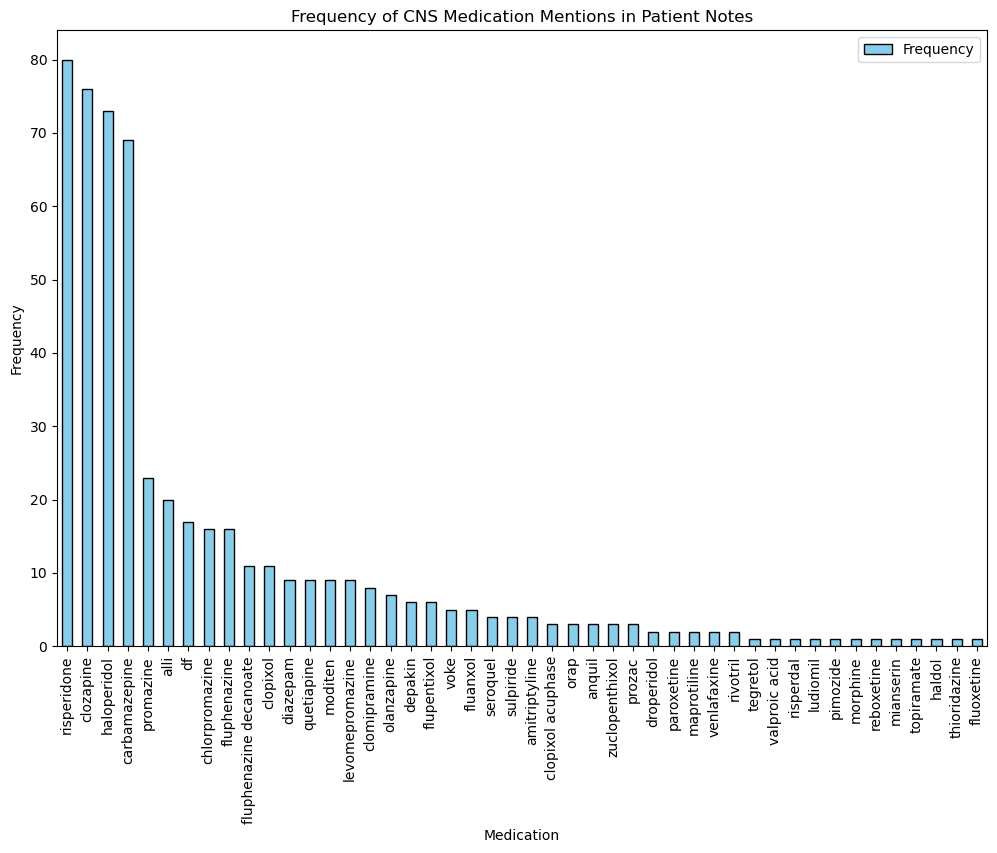

In [143]:
import matplotlib.pyplot as plt

# Sort the DataFrame by frequency and plot
classified_medication_df.sort_values(by='Frequency', ascending=False).plot(kind='bar', x='Medication', y='Frequency', figsize=(12, 8), color='skyblue', edgecolor='black')
plt.title('Frequency of CNS Medication Mentions in Patient Notes')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


## Category prevalance

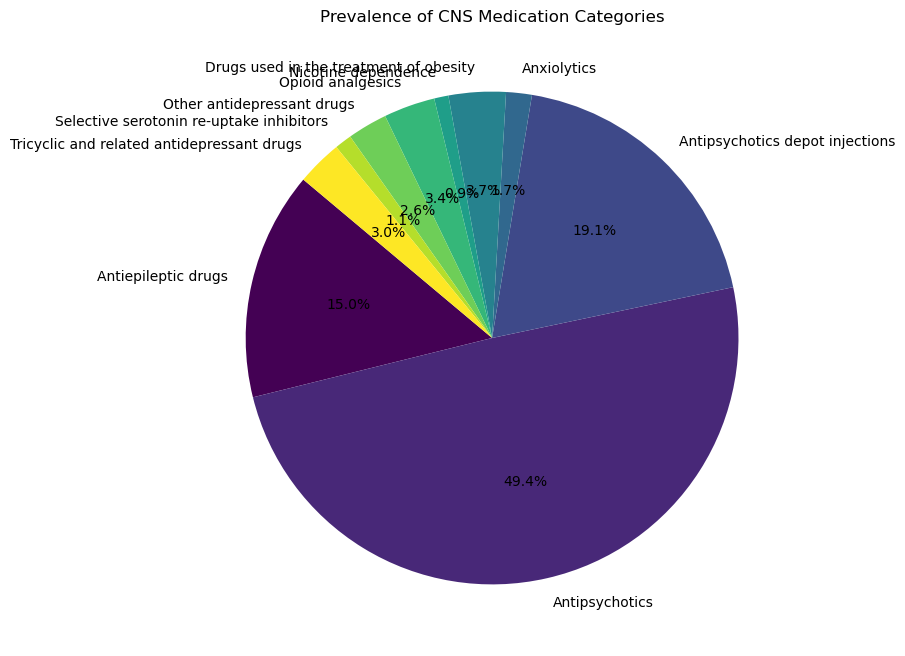

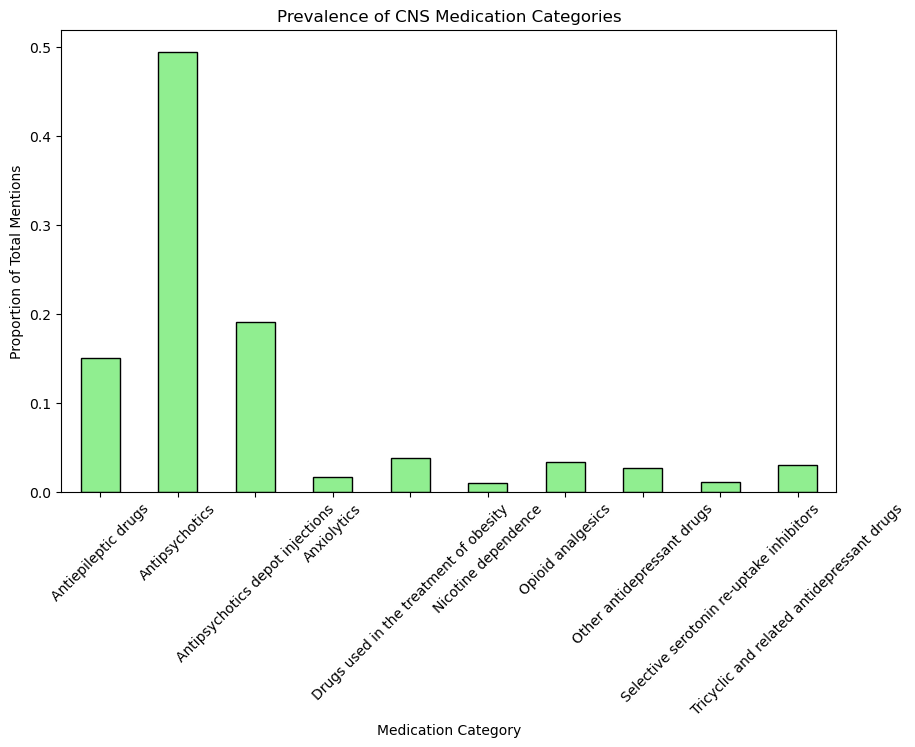

In [151]:

plt.figure(figsize=(8, 8))
category_prevalence.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Prevalence of CNS Medication Categories')
plt.ylabel('')
plt.show()

# or bar chart
plt.figure(figsize=(10, 6))
category_prevalence.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Prevalence of CNS Medication Categories')
plt.xlabel('Medication Category')
plt.ylabel('Proportion of Total Mentions')
plt.xticks(rotation=45)
plt.show()
